In [3]:
%pylab inline

import math
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
import os
import pandas as pd
import numpy as np
import scipy.stats

Populating the interactive namespace from numpy and matplotlib


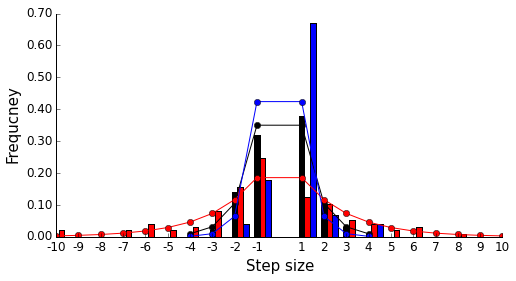

In [4]:
# dinucleotides

# Sun et al
sun_dinuc_step = [-3, -2, -1, 1, 2, 3, 4]
sun_dinuc_freq = [0.02, 0.14, 0.32, 0.38, 0.1, 0.03, 0.01]
sun_dinuc = pd.DataFrame({"step": sun_dinuc_step, "freq": sun_dinuc_freq})

# Huang et al
huang_dinuc_step = range(1, 11) + map(lambda x: -1*x, range(1, 11))
huang_dinuc_freq = map(lambda x: x*1.0/97, [12, 10, 5, 4, 2, 3, 0, 1, 0, 0, 24, 15, 8, 3, 2, 4, 2, 0, 0, 2])
huang_dinuc = pd.DataFrame({"step": huang_dinuc_step, "freq": huang_dinuc_freq})

# Ellegren
ell_dinuc_step = range(1, 5) + map(lambda x: -1*x, range(1, 5))
ell_dinuc_freq = [0.67, 0.069, 0, 0.039, 0.178, 0.0396, 0, 0]
ell_dinuc = pd.DataFrame({"step": ell_dinuc_step, "freq": ell_dinuc_freq})

# Geometric fit
sun_prob_dinuc = sum(sun_dinuc[sun_dinuc["step"].apply(abs) == 1]["freq"])
sun_geom_density = [scipy.stats.geom.pmf(x, sun_prob_dinuc) for x in range(1, 5)]
sun_geom_freq = map(lambda x: x/2, sun_geom_density[::-1] + sun_geom_density)
sun_geom_step = map(lambda x: -1*x, range(1, 5)[::-1]) + range(1, 5)

huang_prob_dinuc = sum(huang_dinuc[huang_dinuc["step"].apply(abs) == 1]["freq"])
huang_geom_density = [scipy.stats.geom.pmf(x, huang_prob_dinuc) for x in range(1, 11)]
huang_geom_freq = map(lambda x: x/2, huang_geom_density[::-1] + huang_geom_density)
huang_geom_step = map(lambda x: -1*x, range(1, 11)[::-1]) + range(1, 11)

ell_prob_dinuc = sum(ell_dinuc[ell_dinuc["step"].apply(abs) == 1]["freq"])
ell_geom_density = [scipy.stats.geom.pmf(x, ell_prob_dinuc) for x in range(1, 5)]
ell_geom_freq = map(lambda x: x/2, ell_geom_density[::-1] + ell_geom_density)
ell_geom_step = map(lambda x: -1*x, range(1, 5)[::-1]) + range(1, 5)

# Plot
fig = plt.figure()
fig.set_size_inches((8, 4))
ax = fig.add_subplot(111)
width=0.25
ax.bar(sun_dinuc_step, sun_dinuc_freq, width=width, color="black", label="Sun", align="center");
ax.bar(map(lambda x: width+x, huang_dinuc_step), huang_dinuc_freq, color="red", width=width, label="Huang", align="center")
ax.bar(map(lambda x: 2*width+x, ell_dinuc_step), ell_dinuc_freq, color="blue", width=width, label="Ellegren", align="center")
ax.plot(sun_geom_step, sun_geom_freq, color="black", marker="o", label="Sun - geom fit")
ax.plot(huang_geom_step, huang_geom_freq, color="red", marker="o", label="Huang - geom fit")
ax.plot(ell_geom_step, ell_geom_freq, color="blue", marker="o", label="Ellegren - geom fit")
ax.set_xlabel("Step size", size=15)
ax.set_ylabel("Frequcney", size=15)
ax.set_xticks(huang_geom_step)
ax.set_xlim(left=-10, right=10)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left()
ax.set_yticklabels(map(lambda x: "%0.2f"%x, ax.get_yticks()), size=12);
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure2_dinucs.pdf"))

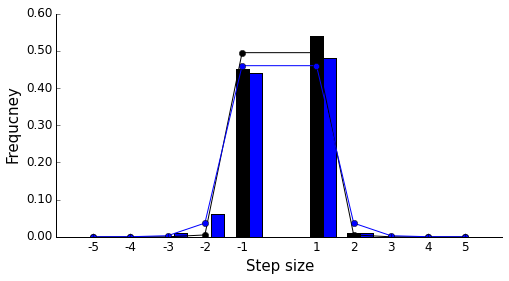

In [5]:
maxa = 6
# Sun et al
sun_tetra_step = [-1, 1, 2]
sun_tetra_freq = [0.45, 0.54, 0.01]
sun_tetra = pd.DataFrame({"step": sun_tetra_step, "freq": sun_tetra_freq})

# Ellegren et al
ell_tetra_step = [-3, -2, -1, 1, 2, 3]
ell_tetra_freq = [0.01, 0.06, 0.44, 0.48, 0.01, 0]
ell_tetra = pd.DataFrame({"step": ell_tetra_step, "freq": ell_tetra_freq})

# Geometric fit
sun_prob_tetra = sum(sun_tetra[sun_tetra["step"].apply(abs) == 1]["freq"])
sun_geom_density = [scipy.stats.geom.pmf(x, sun_prob_tetra) for x in range(1, maxa)]
sun_geom_freq = map(lambda x: x/2, sun_geom_density[::-1] + sun_geom_density)
sun_geom_step = map(lambda x: -1*x, range(1, maxa)[::-1]) + range(1, maxa)

ell_prob_tetra = sum(ell_tetra[ell_tetra["step"].apply(abs) == 1]["freq"])
ell_geom_density = [scipy.stats.geom.pmf(x, ell_prob_tetra) for x in range(1, maxa)]
ell_geom_freq = map(lambda x: x/2, ell_geom_density[::-1] + ell_geom_density)
ell_geom_step = map(lambda x: -1*x, range(1, maxa)[::-1]) + range(1, maxa)

fig = plt.figure()
fig.set_size_inches((8, 4))
ax = fig.add_subplot(111)
width=0.35
ax.bar(sun_tetra_step, sun_tetra_freq, width=width, color="black", label="Sun", align="center");
ax.bar(map(lambda x: x+width, ell_tetra_step), ell_tetra_freq, width=width, color="blue", label="Ellegren", align="center");
ax.plot(sun_geom_step, sun_geom_freq, color="black", marker="o", label="Sun - geom fit")
ax.plot(ell_geom_step, ell_geom_freq, color="blue", marker="o", label="Ellegren - geom fit")
ax.set_xlabel("Step size", size=15)
ax.set_ylabel("Frequcney", size=15)
ax.set_xticks(sun_geom_step)
ax.set_xticklabels(ax.get_xticks(), size=12)
ax.set_yticklabels(map(lambda x: "%0.2f"%x, ax.get_yticks()), size=12);
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left();
fig.savefig(os.path.join(PLOTDIR, "SupplementalFigure2_tetranucs.pdf"))